In [8]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Если что, mushroom - это гриб))
mushroom = pd.read_csv('training_mush.csv')

In [5]:
mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [6]:
clf_rf = RandomForestClassifier(random_state=0)

In [7]:
parametrs = {'n_estimators' : range(10, 50, 10), 
             'max_depth' : range(1, 12, 2), 
             'min_samples_leaf' : range(1, 7), 'min_samples_split' : range(2, 10, 2)}

In [9]:
grid = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [10]:
X_train = mushroom.drop('class', axis=1)

In [11]:
y_train = mushroom['class']

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 50, 10)})

In [16]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [17]:
best_clf_rf = grid.best_estimator_

In [20]:
feature_importances = best_clf_rf.feature_importances_
feature_importances

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [22]:
features = pd.DataFrame({'feature' : list(X_train), 'feature_importances' : feature_importances})

In [24]:
features.sort_values('feature_importances', ascending=False)

,feature,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [25]:
test_mushroom = pd.read_csv('testing_mush.csv')

In [26]:
test_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [27]:
y_pred = best_clf_rf.predict(test_mushroom)

In [29]:
sum(y_pred)

976

In [30]:
correct_y = pd.read_csv('testing_y_mush.csv')

In [31]:
correct_y

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(correct_y, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

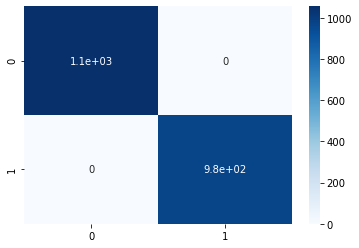

In [34]:
sns.heatmap(confusion_matrix(correct_y, y_pred), annot=True, cmap="Blues")

**------------------------------------------------------------------------------------------------------------------------**

### Теперь поломаем другой датасет

In [36]:
# А invation, если что, вторжение
invasion = pd.read_csv('invasion.csv')

In [37]:
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [38]:
X_train = invasion.drop('class', axis=1)
y_train = invasion['class']

In [40]:
invasion_clf_rf = RandomForestClassifier()

In [39]:
parametrs = {'n_estimators' : range(10, 50, 10), 
             'max_depth' : range(1, 12, 2), 
             'min_samples_leaf' : range(1, 7), 'min_samples_split' : range(2, 10, 2)}

In [41]:
invasion_grid = GridSearchCV(invasion_clf_rf, parametrs, cv=3)

In [42]:
invasion_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 50, 10)})

In [43]:
invasion_grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [44]:
best_invasion_grid = invasion_grid.best_estimator_

In [45]:
X_test = pd.read_csv('operative_information.csv')

In [46]:
y_pred = best_invasion_grid.predict(X_test)

In [47]:
y_pred

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [50]:
pd.Series(y_pred).value_counts()

fighter      675
transport    594
cruiser      231
dtype: int64

In [51]:
fea = best_invasion_grid.feature_importances_

In [52]:
fea

array([0.21609736, 0.02482384, 0.21030079, 0.25833519, 0.        ,
       0.29044283])

In [53]:
importance_fea = pd.DataFrame({'feature' : list(X_train), 'importance' : fea})

In [54]:
importance_fea

,feature,importance
0,g_reflection,0.216097
1,i_reflection,0.024824
2,speed,0.210301
3,brightness,0.258335
4,time_of_observance,0.000000
5,volume,0.290443


**-----------------------------------------------------------------------------------------------------------------------**

### И еще один помучаем

In [55]:
space = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [56]:
space

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


<AxesSubplot:>

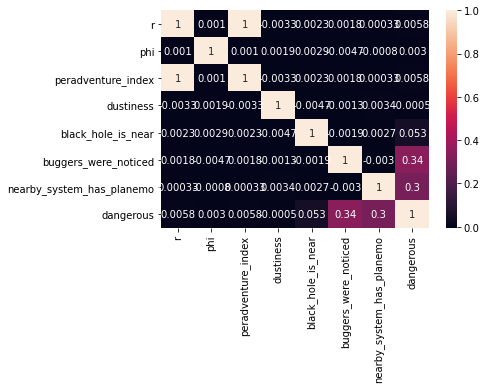

In [57]:
sns.heatmap(space.corr(), annot=True)